# Polars: Blazingly fast dataframes!! üöÄüöÄ

Agenda

* Polars in a nutshell
* Blazingly fast claim
* Coming from pandas
* Example: Expression language

## Polars in a nutshell

* An in memory query engine + DataFrame library written from scratch in Rust
    - Rust: memory safe programming language w/. performance == C/C++
    - Full control over memory / close to the metal

<div>
:<img src="img/rustlang.png" width="200"</img>
</div>

* Apache Arrow as memory model
    - The future of big data communication and columnar store
    
![arrowimg](https://arrow.apache.org/img/shared.png)

* Written for the hardware
    * Moores law is at end (so instead we get tons of cores)
    * Still large memory latencies.

## Title claim

* Mix those 2 great technologies with several lockdowns of time...

* **One of best performing query engines**

<div>
<img src="img/db-benchmark.png" width=700>
</div>

# Let's get a feel for that on 0.5 GB

* `$ SRC_DATANAME=G1_1e7_1e2_0_0 polars/groupby-polars.py`
* `$ SRC_DATANAME=G1_1e7_1e2_0_0 polars/groupby-pandas.py`


# Coming from pandas

## Performance
*  5-20x pandas (in db-benchmark)

## Memory requirements (for algorithms)
* pandas: ~10x dataset size (according to pandas dev)
* polars: ~2/3x dataset size



## Coming from pandas (design): first class dtypes

### Missing data != `NaN`

* adding missing values, can cause dtype changes

```python
assert pd.DataFrame({"integers": [1, None, 2]}).dtypes[0] == np.int64
```

```
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-13-88b9defd12a1> in <module>
----> 1 assert pd.DataFrame({"integers": [1, None, 2]}).dtypes[0] == np.int64

AssertionError: 
```



## Coming from pandas (design): first class dtypes

### String data are boxed python objects

```python
pd.DataFrame({"strings": ["foo", "ham", "bar"]}).dtypes
```

```
strings    object
dtype: object
```

<div>
<img src="img/pandas-string.svg"</img>
</div>

## Coming from pandas (design): no indexes

_my subjective claims_

* Code is read more often than written.
* Usage of indexes in the wild cost more compute than what they should save

* I never understood them much (ironically)

## No indexes gives us predictable indexing

```
df.iloc # not needed
df.loc # not needed
```

https://pola-rs.github.io/polars-book/user-guide/indexing.html#comparison-with-pandas

#[cfg(feature = "pretty_fmt")]
use comfy_table::modifiers::UTF8_ROUND_CORNERS;
## Coming from pandas (design): Free cloning

**pandas:**
```
    
[..............]

copy:
    - [..............]
copy:
    - [..............]
```


**polars:**
```
    
RC<[..............]> 

copy:
    - *ptr
copy:
    - *ptr
```



* immutable -> copy on write semantics
* easy to write pure functions
* No `SettingWithCopyWarning`


## Coming from pandas (design): Lazy evaluation

Polars is:

* eager
* semi-lazy.
* lazy


Idiomatic polars is:
* semi-lazy.
* lazy

## This yields
* Context
* Optimizations
* Readability -> write your intention, not how to do it

In [1]:
import polars as pl
from polars import col, lit, when

# Expressions

`fn(Series) -> Series`

* Lazily evaluated
    - Can be optimized
    - Gives the library writer context and informed decision can be made
* Embarassingly parallel
* Context dependent
    - selection / projection -> `Series` = **COLUMN, LITERAL or VALUE**
    - aggregation -> `Series` = **GROUPS**


In [2]:
df = pl.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "fruits": ["banana", "banana", "apple", "apple", "banana"],
        "B": [5, 4, 3, 2, 1],
        "cars": ["beetle", "audi", "beetle", "beetle", "beetle"],
        "optional": [28, 300, None, 2, -30],
    }
)
df

shape: (5, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ fruits   ‚îÜ B   ‚îÜ cars     ‚îÜ optional ‚îÇ
‚îÇ --- ‚îÜ ---      ‚îÜ --- ‚îÜ ---      ‚îÜ ---      ‚îÇ
‚îÇ i64 ‚îÜ str      ‚îÜ i64 ‚îÜ str      ‚îÜ i64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1   ‚îÜ "banana" ‚îÜ 5   ‚îÜ "beetle" ‚îÜ 28       ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ "banana" ‚îÜ 4   ‚îÜ "audi"   ‚îÜ 300      ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 3   ‚îÜ "apple"  ‚îÜ 3   ‚îÜ "beetle" ‚îÜ null     ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 4   ‚îÜ "apple"  ‚îÜ 2   ‚îÜ "beetle" ‚îÜ 2        ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 5   ‚îÜ "banana" ‚îÜ 1   ‚îÜ "beetle" ‚îÜ -30      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# Selection context

In [17]:
# We can select by name
(df.select([
    col("A"),
    "B",      # the col part is inferred
    lit("B"),  # we must tell polars we mean the literal "B"
    col("fruits"),
]))

shape: (5, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ B   ‚îÜ literal ‚îÜ fruits   ‚îÇ
‚îÇ --- ‚îÜ --- ‚îÜ ---     ‚îÜ ---      ‚îÇ
‚îÇ i64 ‚îÜ i64 ‚îÜ str     ‚îÜ str      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1   ‚îÜ 5   ‚îÜ "B"     ‚îÜ "banana" ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ 4   ‚îÜ "B"     ‚îÜ "banana" ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 3   ‚îÜ 3   ‚îÜ "B"     ‚îÜ "apple"  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 4   ‚îÜ 2   ‚îÜ "B"     ‚îÜ "apple"  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 5   ‚îÜ 1   ‚îÜ "B"     ‚îÜ "banana" ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [18]:
# you can select columns with a regex if it starst with '^' and ends with '$'

(df.select([
    col("^A|B$").sum()
]))

shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ B   ‚îÇ
‚îÇ --- ‚îÜ --- ‚îÇ
‚îÇ i64 ‚îÜ i64 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 15  ‚îÜ 15  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [19]:
# you can select multiple columns by name

(df.select([
    col(["A", "B"]).sum()
]))

shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ B   ‚îÇ
‚îÇ --- ‚îÜ --- ‚îÇ
‚îÇ i64 ‚îÜ i64 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 15  ‚îÜ 15  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [20]:
# We select everything in normal order
# Then we select everything in reversed order
(df.select([
    pl.all(),
    pl.all().reverse().suffix("_reverse")
]))

shape: (5, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ fruits   ‚îÜ B   ‚îÜ cars     ‚îÜ ... ‚îÜ fruits_revers ‚îÜ B_reverse ‚îÜ cars_reverse  ‚îÜ optional_rev ‚îÇ
‚îÇ --- ‚îÜ ---      ‚îÜ --- ‚îÜ ---      ‚îÜ     ‚îÜ e             ‚îÜ ---       ‚îÜ ---           ‚îÜ erse         ‚îÇ
‚îÇ i64 ‚îÜ str      ‚îÜ i64 ‚îÜ str      ‚îÜ     ‚îÜ ---           ‚îÜ i64       ‚îÜ str           ‚îÜ ---          ‚îÇ
‚îÇ     ‚îÜ          ‚îÜ     ‚îÜ          ‚îÜ     ‚îÜ str           ‚îÜ           ‚îÜ               ‚îÜ i64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1   ‚îÜ "banana" ‚îÜ 5   ‚îÜ "beetle" ‚îÜ ... ‚îÜ "banana"      ‚îÜ 1         ‚îÜ "beetle"      ‚îÜ -30          ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ "banana" ‚îÜ 4   ‚îÜ "audi"   ‚îÜ ... ‚îÜ "apple"       ‚îÜ 2         ‚îÜ "beetle"      ‚îÜ 2            ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 3   ‚îÜ "apple"  ‚îÜ 3   ‚îÜ "beetle" ‚îÜ ... ‚îÜ "apple"       ‚îÜ 3         ‚îÜ "beetle"      ‚îÜ null         ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 4   ‚îÜ "apple"  ‚îÜ 2   ‚îÜ "beetle" ‚îÜ ... ‚îÜ "banana"      ‚îÜ 4         ‚îÜ "audi"        ‚îÜ 300          ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 5   ‚îÜ "banana" ‚îÜ 1   ‚îÜ "beetle" ‚îÜ ... ‚îÜ "banana"      ‚îÜ 5         ‚îÜ "beetle"      ‚îÜ 28           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [21]:
# all expressions run in parallel
# single valued `Series` are broadcasted to the shape of the `DataFrame`
(df.select([
    pl.all(),
    pl.all().sum().suffix("_sum")
]))

shape: (5, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ fruits   ‚îÜ B   ‚îÜ cars     ‚îÜ ... ‚îÜ fruits_sum ‚îÜ B_sum ‚îÜ cars_sum ‚îÜ optional_sum ‚îÇ
‚îÇ --- ‚îÜ ---      ‚îÜ --- ‚îÜ ---      ‚îÜ     ‚îÜ ---        ‚îÜ ---   ‚îÜ ---      ‚îÜ ---          ‚îÇ
‚îÇ i64 ‚îÜ str      ‚îÜ i64 ‚îÜ str      ‚îÜ     ‚îÜ str        ‚îÜ i64   ‚îÜ str      ‚îÜ i64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1   ‚îÜ "banana" ‚îÜ 5   ‚îÜ "beetle" ‚îÜ ... ‚îÜ null       ‚îÜ 15    ‚îÜ null     ‚îÜ 300          ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ "banana" ‚îÜ 4   ‚îÜ "audi"   ‚îÜ ... ‚îÜ null       ‚îÜ 15    ‚îÜ null     ‚îÜ 300          ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 3   ‚îÜ "apple"  ‚îÜ 3   ‚îÜ "beetle" ‚îÜ ... ‚îÜ null       ‚îÜ 15    ‚îÜ null     ‚îÜ 300          ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 4   ‚îÜ "apple"  ‚îÜ 2   ‚îÜ "beetle" ‚îÜ ... ‚îÜ null       ‚îÜ 15    ‚îÜ null     ‚îÜ 300          ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 5   ‚îÜ "banana" ‚îÜ 1   ‚îÜ "beetle" ‚îÜ ... ‚îÜ null       ‚îÜ 15    ‚îÜ null     ‚îÜ 300          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [22]:
# there are `str` and `dt` namespaces for specialized functions

predicate = col("fruits").str.contains("^b.*")

(df.select([
    predicate
]))

shape: (5, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits ‚îÇ
‚îÇ ---    ‚îÇ
‚îÇ bool   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ true   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ true   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ false  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ false  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ true   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [23]:
# use the predicate to filter

df.filter(predicate)

shape: (3, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ fruits   ‚îÜ B   ‚îÜ cars     ‚îÜ optional ‚îÇ
‚îÇ --- ‚îÜ ---      ‚îÜ --- ‚îÜ ---      ‚îÜ ---      ‚îÇ
‚îÇ i64 ‚îÜ str      ‚îÜ i64 ‚îÜ str      ‚îÜ i64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1   ‚îÜ "banana" ‚îÜ 5   ‚îÜ "beetle" ‚îÜ 28       ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ "banana" ‚îÜ 4   ‚îÜ "audi"   ‚îÜ 300      ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 5   ‚îÜ "banana" ‚îÜ 1   ‚îÜ "beetle" ‚îÜ -30      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [24]:
# predicate expressions can be used to filter

(df.select([
    col("A").filter(col("fruits").str.contains("^b.*")).sum(),
    (col("B").filter(col("cars").str.contains("^b.*")).sum() * col("B").sum()).alias("some_compute()"),
]))

shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ some_compute() ‚îÇ
‚îÇ --- ‚îÜ ---            ‚îÇ
‚îÇ i64 ‚îÜ i64            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 8   ‚îÜ 165            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [25]:
# We can do arithmetic on columns and (literal) values

# can be evaluated to 1 without programmer knowing
some_var = 1

(df.select([
    ((col("A") / 124.0 * col("B")) / pl.sum("B") * some_var).alias("computed")
]))

shape: (5, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ computed              ‚îÇ
‚îÇ ---                   ‚îÇ
‚îÇ f64                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0026881720430107525 ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 0.004301075268817204  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 0.004838709677419354  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 0.004301075268817204  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 0.0026881720430107525 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

i32 -> [1, 2, 4]

[
[1, 2],
[],
[4]
}
.
- [0, 3, 3, 5]

In [26]:
# We can combine columns by a predicate

(df.select([
    "fruits",
    "B",
    when(col("fruits") == "banana").then(col("B")).otherwise(-1).alias("b")
]))

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B   ‚îÜ b   ‚îÇ
‚îÇ ---      ‚îÜ --- ‚îÜ --- ‚îÇ
‚îÇ str      ‚îÜ i64 ‚îÜ i64 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "banana" ‚îÜ 5   ‚îÜ 5   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 4   ‚îÜ 4   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 3   ‚îÜ -1  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 2   ‚îÜ -1  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 1   ‚îÜ 1   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [27]:
# We can combine columns by a fold operation on column level

(df.select([
    "A",
    "B",
    pl.fold(0, lambda a, b: a + b, [col("A"), "B", col("B")**2, col("A") / 2.0]).alias("fold")
]))

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ A   ‚îÜ B   ‚îÜ fold ‚îÇ
‚îÇ --- ‚îÜ --- ‚îÜ ---  ‚îÇ
‚îÇ i64 ‚îÜ i64 ‚îÜ f64  ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1   ‚îÜ 5   ‚îÜ 31.5 ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ 4   ‚îÜ 23   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 3   ‚îÜ 3   ‚îÜ 16.5 ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 4   ‚îÜ 2   ‚îÜ 12   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 5   ‚îÜ 1   ‚îÜ 9.5  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [30]:
# even combine all 

(df.select([
    pl.arange(0, df.height).alias("idx"),
    "A",
    col("A").shift(),
    pl.concat_str(pl.all(), "-").alias("str_concat_1"),  # prefer this
    pl.fold(col("A"), lambda a, b: a + "-" + b, pl.all().exclude("A")).alias("str_concat_2"),  # over this (accidentally O(n^2))
]))

shape: (5, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ idx ‚îÜ A   ‚îÜ A    ‚îÜ str_concat_1            ‚îÜ str_concat_2            ‚îÇ
‚îÇ --- ‚îÜ --- ‚îÜ ---  ‚îÜ ---                     ‚îÜ ---                     ‚îÇ
‚îÇ i64 ‚îÜ i64 ‚îÜ i64  ‚îÜ str                     ‚îÜ str                     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0   ‚îÜ 1   ‚îÜ null ‚îÜ "1-banana-5-beetle-28"  ‚îÜ "1-banana-5-beetle-28"  ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 1   ‚îÜ 2   ‚îÜ 1    ‚îÜ "2-banana-4-audi-300"   ‚îÜ "2-banana-4-audi-300"   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 2   ‚îÜ 3   ‚îÜ 2    ‚îÜ null                    ‚îÜ null                    ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 3   ‚îÜ 4   ‚îÜ 3    ‚îÜ "4-apple-2-beetle-2"    ‚îÜ "4-apple-2-beetle-2"    ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ 4   ‚îÜ 5   ‚îÜ 4    ‚îÜ "5-banana-1-beetle--30" ‚îÜ "5-banana-1-beetle--30" ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# Aggregation context
* expression are applied over groups instead of columns

In [33]:
# we can still combine many expressions

(df.sort("cars").groupby("fruits")
    .agg([
        col("B").sum(),
        pl.sum("B").alias("B_sum2"),  # syntactic sugar for the first
        pl.first("fruits"),
        pl.count("A").alias("count"),
        col("cars").reverse()
    ]))

shape: (2, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B_sum ‚îÜ B_sum2 ‚îÜ fruits_first ‚îÜ count ‚îÜ cars                   ‚îÇ
‚îÇ ---      ‚îÜ ---   ‚îÜ ---    ‚îÜ ---          ‚îÜ ---   ‚îÜ ---                    ‚îÇ
‚îÇ str      ‚îÜ i64   ‚îÜ i64    ‚îÜ str          ‚îÜ u32   ‚îÜ list [str]             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ [beetle, beetle, audi] ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 5     ‚îÜ 5      ‚îÜ "apple"      ‚îÜ 2     ‚îÜ [beetle, beetle]       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [34]:
# We can explode the list column "cars"

(df.sort("cars").groupby("fruits")
    .agg([
        col("B").sum(),
        pl.sum("B").alias("B_sum2"),  # syntactic sugar for the first
        pl.first("fruits"),
        pl.count("A").alias("count"),
        col("cars").reverse()
    ])).explode("cars")

shape: (5, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B_sum ‚îÜ B_sum2 ‚îÜ fruits_first ‚îÜ count ‚îÜ cars     ‚îÇ
‚îÇ ---      ‚îÜ ---   ‚îÜ ---    ‚îÜ ---          ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str      ‚îÜ i64   ‚îÜ i64    ‚îÜ str          ‚îÜ u32   ‚îÜ str      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "apple"  ‚îÜ 5     ‚îÜ 5      ‚îÜ "apple"      ‚îÜ 2     ‚îÜ "beetle" ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 5     ‚îÜ 5      ‚îÜ "apple"      ‚îÜ 2     ‚îÜ "beetle" ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ "beetle" ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ "beetle" ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ "audi"   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [18]:
(df.groupby("fruits")
    .agg([
        col("B").sum(),
        pl.sum("B").alias("B_sum2"),  # syntactic sugar for the first
        pl.first("fruits"),
        pl.count("A").alias("count"),
        col("B").shift().alias("B_shifted")
    ])
 .explode("B_shifted")
)

shape: (5, 6)
‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ fruits   ‚îÜ B_sum ‚îÜ B_sum2 ‚îÜ fruits_first ‚îÜ count ‚îÜ B_shifted ‚îÇ
‚îÇ ---      ‚îÜ ---   ‚îÜ ---    ‚îÜ ---          ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ str      ‚îÜ i64   ‚îÜ i64    ‚îÜ str          ‚îÜ u32   ‚îÜ i64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ null      ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ 5         ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 10    ‚îÜ 10     ‚îÜ "banana"     ‚îÜ 3     ‚îÜ 4         ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 5     ‚îÜ 5      ‚îÜ "apple"      ‚îÜ 2     ‚îÜ null      ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 5     ‚îÜ 5      ‚îÜ "apple"      ‚îÜ 2     ‚îÜ 3         ‚îÇ
‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïØ

In [39]:
# we can also get the list of the groups
(df.groupby("fruits")
    .agg([
         col("B").shift().alias("shift_B"),
         col("B").reverse().alias("rev_B"),
    ]))

shape: (2, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ shift_B      ‚îÜ rev_B      ‚îÇ
‚îÇ ---      ‚îÜ ---          ‚îÜ ---        ‚îÇ
‚îÇ str      ‚îÜ list [i64]   ‚îÜ list [i64] ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "apple"  ‚îÜ [null, 3]    ‚îÜ [2, 3]     ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ [null, 5, 4] ‚îÜ [1, 4, 5]  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [40]:
# we can do predicates in the groupby as well

(df.groupby("fruits")
    .agg([
        col("B").filter(col("B") > 1).list().keep_name(),
    ]))

shape: (2, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B          ‚îÇ
‚îÇ ---      ‚îÜ ---        ‚îÇ
‚îÇ str      ‚îÜ list [i64] ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "banana" ‚îÜ [5, 4]     ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ [3, 2]     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [41]:
# and sum only by the values where the predicates are true

(df.groupby("fruits")
    .agg([
        col("B").filter(col("B") > 1).mean(),
    ]))

shape: (2, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B_mean ‚îÇ
‚îÇ ---      ‚îÜ ---    ‚îÇ
‚îÇ str      ‚îÜ f64    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "apple"  ‚îÜ 2.5    ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 4.5    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [42]:
# Another example
(df.groupby("fruits")
    .agg([
        col("B").shift_and_fill(1, fill_value=0).alias("shifted"),
        col("B").shift_and_fill(1, fill_value=0).sum().alias("shifted_sum"),
    ]))

shape: (2, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ shifted    ‚îÜ shifted_sum ‚îÇ
‚îÇ ---      ‚îÜ ---        ‚îÜ ---         ‚îÇ
‚îÇ str      ‚îÜ list [i64] ‚îÜ i64         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "banana" ‚îÜ [0, 5, 4]  ‚îÜ 9           ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ [0, 3]     ‚îÜ 3           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# Window functions!

* Expression with superpowers.
* Aggregation in selection context


```python
col("foo").aggregation_expression(..).over("column_used_to_group")
```


In [44]:
# groupby 2 different columns

(df.sort("fruits")
.select([
    "fruits",
    "cars",
    "B",
    col("B").sum().over("fruits").alias("B_sum_by_fruits"),
    col("B").sum().over("cars").alias("B_sum_by_cars"),
]))

shape: (5, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ cars     ‚îÜ B   ‚îÜ B_sum_by_fruits ‚îÜ B_sum_by_cars ‚îÇ
‚îÇ ---      ‚îÜ ---      ‚îÜ --- ‚îÜ ---             ‚îÜ ---           ‚îÇ
‚îÇ str      ‚îÜ str      ‚îÜ i64 ‚îÜ i64             ‚îÜ i64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "apple"  ‚îÜ "beetle" ‚îÜ 3   ‚îÜ 5               ‚îÜ 11            ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ "beetle" ‚îÜ 2   ‚îÜ 5               ‚îÜ 11            ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ "beetle" ‚îÜ 5   ‚îÜ 10              ‚îÜ 11            ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ "audi"   ‚îÜ 4   ‚îÜ 10              ‚îÜ 4             ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ "beetle" ‚îÜ 1   ‚îÜ 10              ‚îÜ 11            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [47]:
# reverse B by groups and show the results in original DF

(df.sort("fruits")
.select([
    "fruits",
    "B",
    col("B").reverse().over("fruits").flatten()
]))

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B   ‚îÜ B   ‚îÇ
‚îÇ ---      ‚îÜ --- ‚îÜ --- ‚îÇ
‚îÇ str      ‚îÜ i64 ‚îÜ i64 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "apple"  ‚îÜ 3   ‚îÜ 2   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 2   ‚îÜ 3   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 5   ‚îÜ 1   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 4   ‚îÜ 4   ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 1   ‚îÜ 5   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [48]:
# Lag a column within "fruits"
(df
.sort("fruits")
.select([
    "fruits",
    "B",
    col("B").shift().over("fruits").flatten().alias("lag_B_by_fruits")
]))

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fruits   ‚îÜ B   ‚îÜ lag_B_by_fruits ‚îÇ
‚îÇ ---      ‚îÜ --- ‚îÜ ---             ‚îÇ
‚îÇ str      ‚îÜ i64 ‚îÜ i64             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ "apple"  ‚îÜ 3   ‚îÜ null            ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "apple"  ‚îÜ 2   ‚îÜ 3               ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 5   ‚îÜ null            ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 4   ‚îÜ 5               ‚îÇ
‚îú‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚îº‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚ïå‚î§
‚îÇ "banana" ‚îÜ 1   ‚îÜ 4               ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# True lazyness

In [4]:
df2 = pl.DataFrame({
    "fruits": ["banana", None, "apple"],
    "cars": ["audi", "beetle", None]
})

q = (df.lazy()
     .sort("fruits")
     .join(df2.lazy(), on="fruits")
     .filter(col("B") > 3)
     .select([
        "fruits",
        "cars",
        "B",
    ])
)


In [5]:
print(q.describe_plan())

SELECT 3 COLUMNS 
FROM
FILTER
	[(B) Gt (Int64(3))]
FROM
	JOIN
	(SORT TABLE: ["A", "fruits", "B", "cars"]; PROJECT */5 COLUMNS; SELECTION: None BY [fruits])
WITH
	(TABLE: ["fruits", "cars"]; PROJECT */2 COLUMNS; SELECTION: None)
ON (left: [fruits] right: [fruits])


In [11]:
print(q.describe_optimized_plan())

UDF UDF JOIN
	(SORT TABLE: ["A", "fruits", "B", "cars"]; PROJECT 3/5 COLUMNS; SELECTION: Some([(B) Gt (Int64(3))]) BY [fruits])
WITH
	(TABLE: ["fruits", "cars"]; PROJECT 2/2 COLUMNS; SELECTION: None)
ON (left: [fruits] right: [fruits])


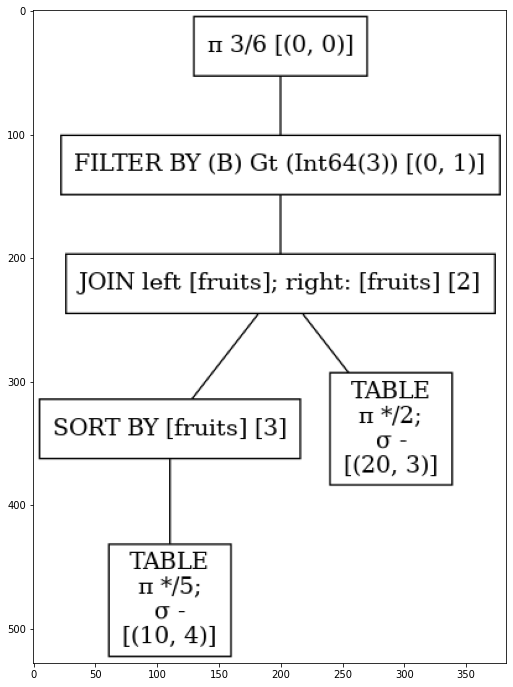

In [7]:
q.show_graph(optimized=False)

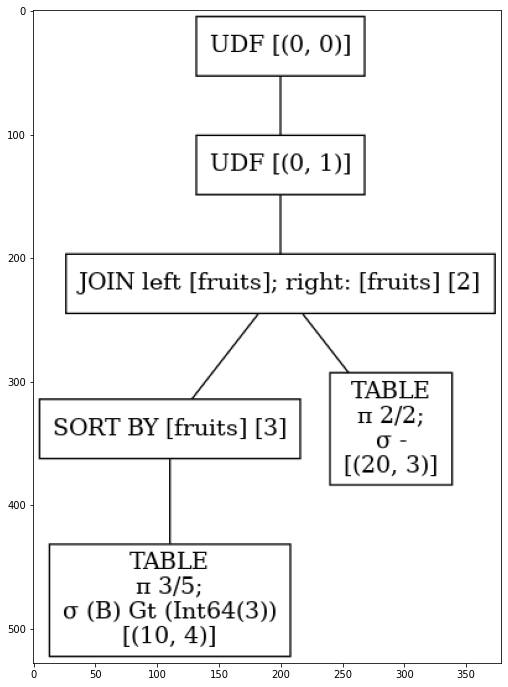

In [8]:
q.show_graph(optimized=True)